# Improved Resume Classifier Model Training and Visualization

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load cleaned data
df = pd.read_csv('/content/drive/MyDrive/MISC/resume_cleaned.csv')


# In this notebook, we'll:
 - Train an improved model (e.g., add TF-IDF + RandomForest)
 - Evaluate the model
 - Visualize updated results with confusion matrix, F1-scores, and support

In [ ]:
# Split data into features and target
X = df['Cleaned_Resume']
y = df['Category']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Vectorize text with TF-IDF
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
# Train Random Forest classifier
rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [ ]:
# Predictions on test set
y_pred = rf.predict(X_test_tfidf)

In [ ]:
# Evaluation report
target_names = sorted(y.unique())
report = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:\n", report)

# %%
# Save model and vectorizer if desired (optional)
# import joblib
# joblib.dump(rf, '../models/rf_resume_classifier.pkl')
# joblib.dump(tfidf, '../models/tfidf_vectorizer.pkl')

Classification Report:
                            precision    recall  f1-score   support

               Accountant       0.73      0.94      0.82        70
                 Advocate       0.77      0.86      0.81        58
              Agriculture       0.88      1.00      0.94        59
                  Apparel       0.84      0.91      0.87        64
             Architecture       0.91      0.75      0.83        69
                     Arts       0.84      0.82      0.83        66
               Automobile       0.75      0.65      0.69        63
                 Aviation       0.88      1.00      0.94        68
                      BPO       0.93      0.62      0.75        40
                  Banking       0.83      0.95      0.89        63
               Blockchain       1.00      0.44      0.62         9
Building and Construction       0.85      0.93      0.89        69
         Business Analyst       0.80      0.93      0.86        68
           Civil Engineer       0.93 

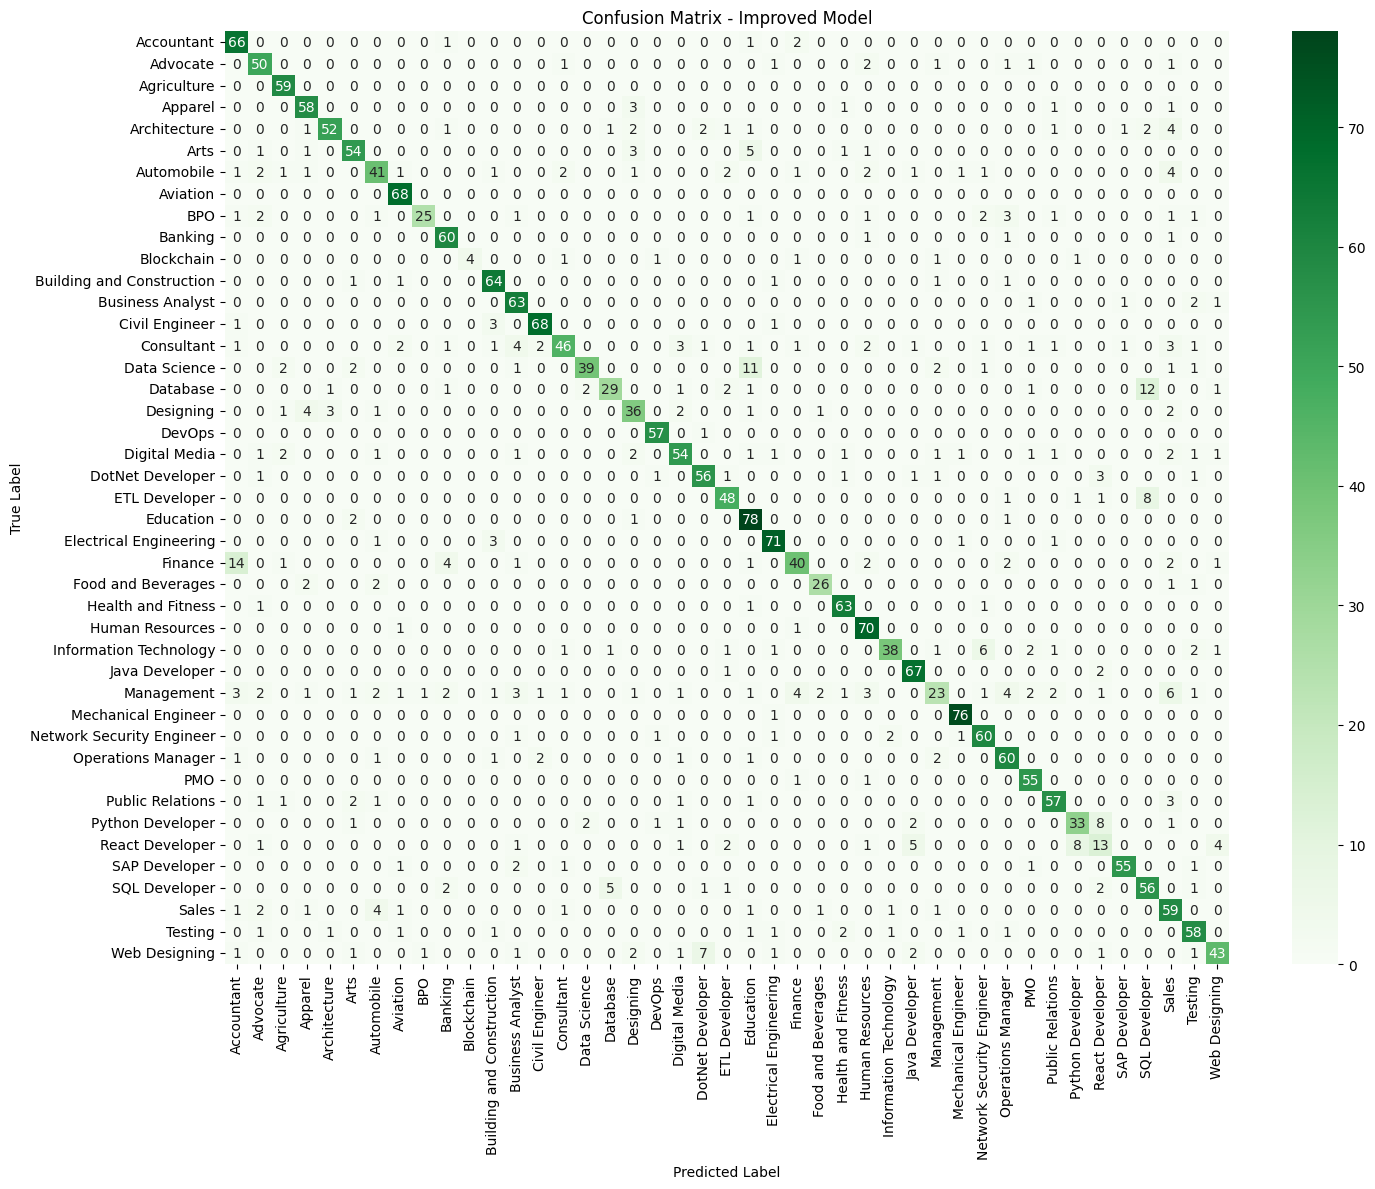

In [ ]:
# Visualization

report_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
cm = confusion_matrix(y_test, y_pred, labels=target_names)

plt.figure(figsize=(15,12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Improved Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


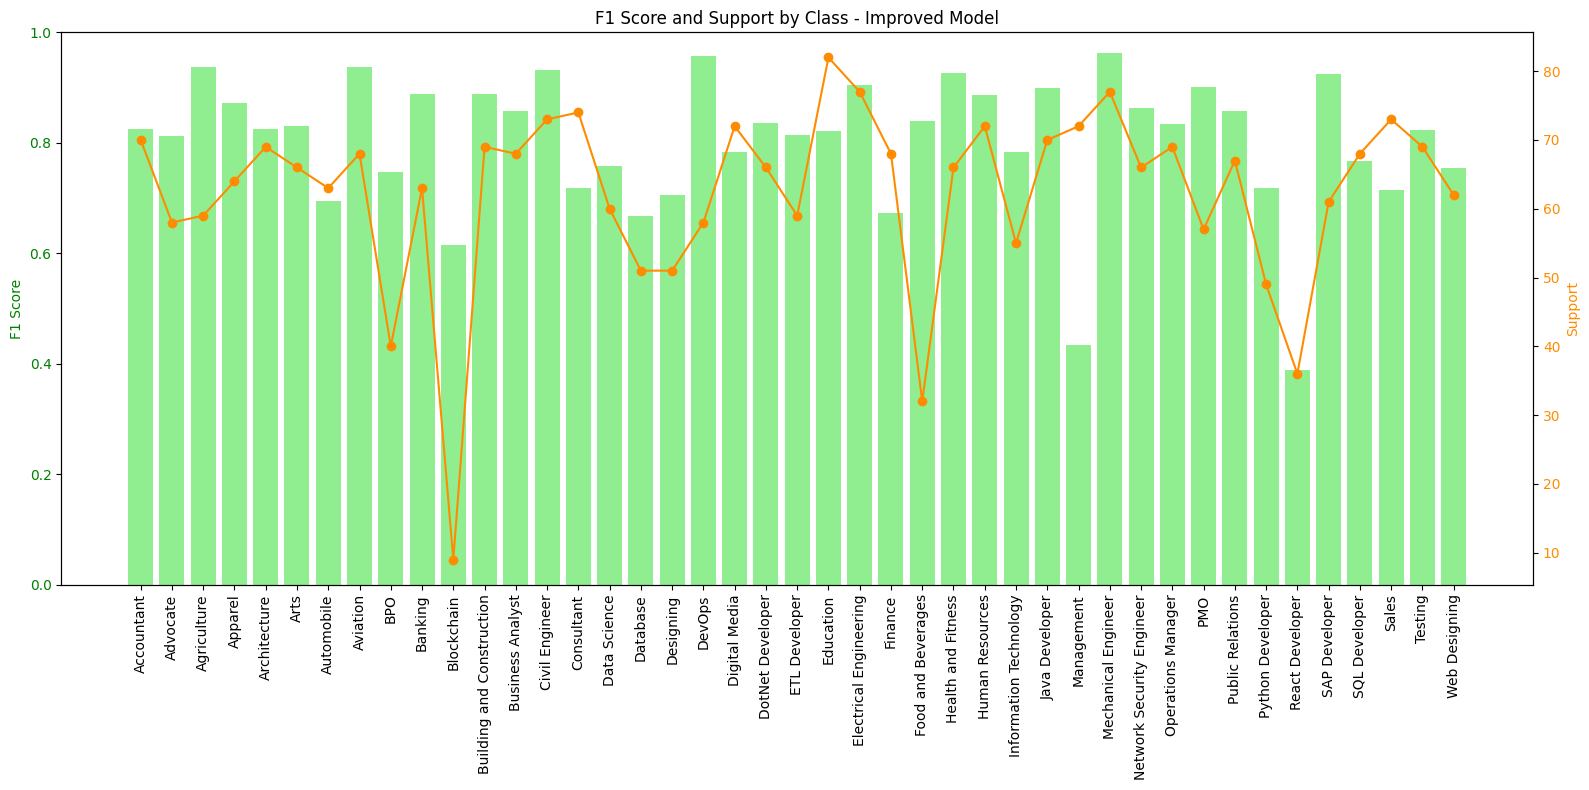

In [ ]:


# %%
f1_scores = [report_dict[label]['f1-score'] for label in target_names]
support = [report_dict[label]['support'] for label in target_names]

fig, ax1 = plt.subplots(figsize=(16,8))

bars = ax1.bar(target_names, f1_scores, color='lightgreen', label='F1 Score')
ax1.set_ylabel('F1 Score', color='green')
ax1.set_ylim(0, 1)
ax1.tick_params(axis='y', labelcolor='green')
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax2.plot(target_names, support, color='darkorange', marker='o', label='Support (Sample Count)')
ax2.set_ylabel('Support', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

plt.title('F1 Score and Support by Class - Improved Model')
fig.tight_layout()
plt.show()
